In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 2.0.2
Matplotlib version: 3.9.2


In [4]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('./data/wind.csv',sep = r'\s+',parse_dates = [[0,1,2]])
data 

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [8]:
import datetime
def fix_date(x):
    year = x.year -100 if x.year>2024 else x.year
    return pd.to_datetime(datetime.date(year,x.month,x.day))
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_date)

In [9]:
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [12]:
data.set_index('Yr_Mo_Dy',inplace = True)

In [5]:
#对应每一个location,一共有多少数据值缺失
data.isna().sum().reset_index()

,index,0
0,Yr_Mo_Dy,0
1,RPT,6
2,VAL,3
3,ROS,2
4,KIL,5
5,SHA,2
6,BIR,0
7,DUB,3
8,CLA,2
9,MUL,3


In [10]:
#对于全体数据,一共有多少完整的数据值
data.notna().sum() / data.shape[0]

Yr_Mo_Dy    1.000000
RPT         0.999087
VAL         0.999544
ROS         0.999696
KIL         0.999239
SHA         0.999696
BIR         1.000000
DUB         0.999544
CLA         0.999696
MUL         0.999544
CLO         0.999848
BEL         1.000000
MAL         0.999392
dtype: float64

In [13]:
loc_stats = data.agg(['min','max','mean','std'],axis = 1)

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [ ]:
day_stats = data.agg()

In [14]:
data_titan = pd.read_csv('./data/titanic.csv')

In [15]:
data_titan.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
survived_agg = data_titan['survived'].apply(lambda x: '生存' if x == 1 else '死亡').value_counts().reset_index().values.tolist()
survived_agg2 = data_titan['survived'].map({1:'存活',0:'死亡'}).value_counts()

In [63]:
survived_agg2.index

Index(['死亡', '存活'], dtype='object', name='survived')

In [67]:
survived_agg

[['死亡', 549], ['生存', 342]]

In [25]:
data_titan.groupby(by = 'sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [69]:
from pyecharts.charts import Bar
bar = (Bar()
       .add_xaxis([i[0] for i in survived_agg])
       .add_yaxis('生存和死亡人数',[i[1] for i in survived_agg])
       )
bar.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\综合实训课程1\\panda数据分析练习题\\render.html'

In [70]:
import matplotx
plt.style.use(matplotx.styles.pitaya_smoothie['light'])
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

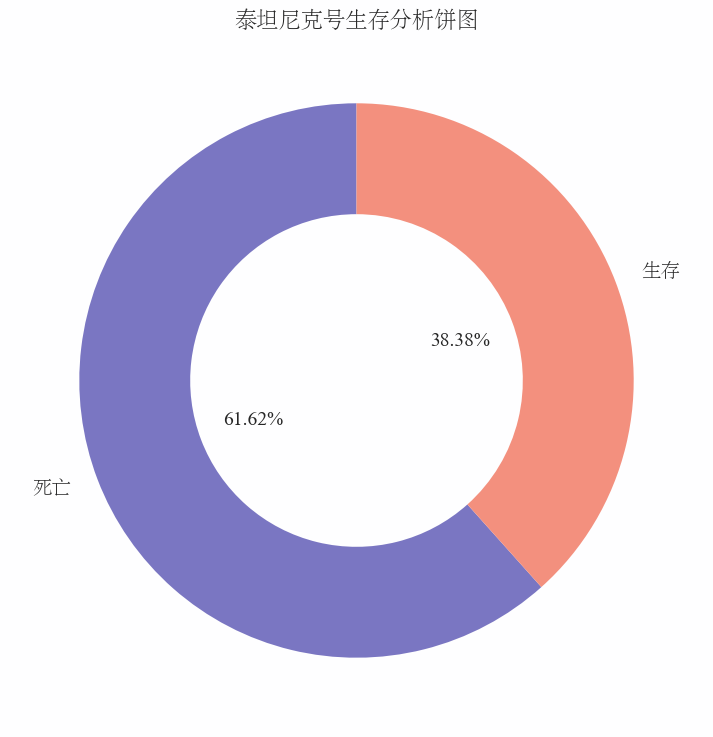

In [72]:
plt.figure(figsize = (12,9),dpi = 100)
wedges,texts,autotexts = plt.pie([i[1] for i in survived_agg],
        labels = [i[0] for i in survived_agg],
        autopct = '%.2f%%',
        startangle = 90,
        wedgeprops={'width':0.4},
        pctdistance=.4,
        )
plt.title('泰坦尼克号生存分析饼图',fontproperties = 'STsong',fontsize = 16)
plt.setp(texts,fontproperties = 'STsong')
plt.savefig('./out_data/pie_01.pdf',dpi = 300,bbox_inches = 'tight',pad_inches = 0)
plt.show()

In [74]:
data_titan['survived'] = data_titan['survived'].map({0:"死亡",1:'生存'})

In [76]:
data_titan.groupby(by = ['sex','survived'],as_index = False).size()

,sex,survived,size
0,female,死亡,81
1,female,生存,233
2,male,死亡,468
3,male,生存,109


<function matplotlib.pyplot.show(close=None, block=None)>

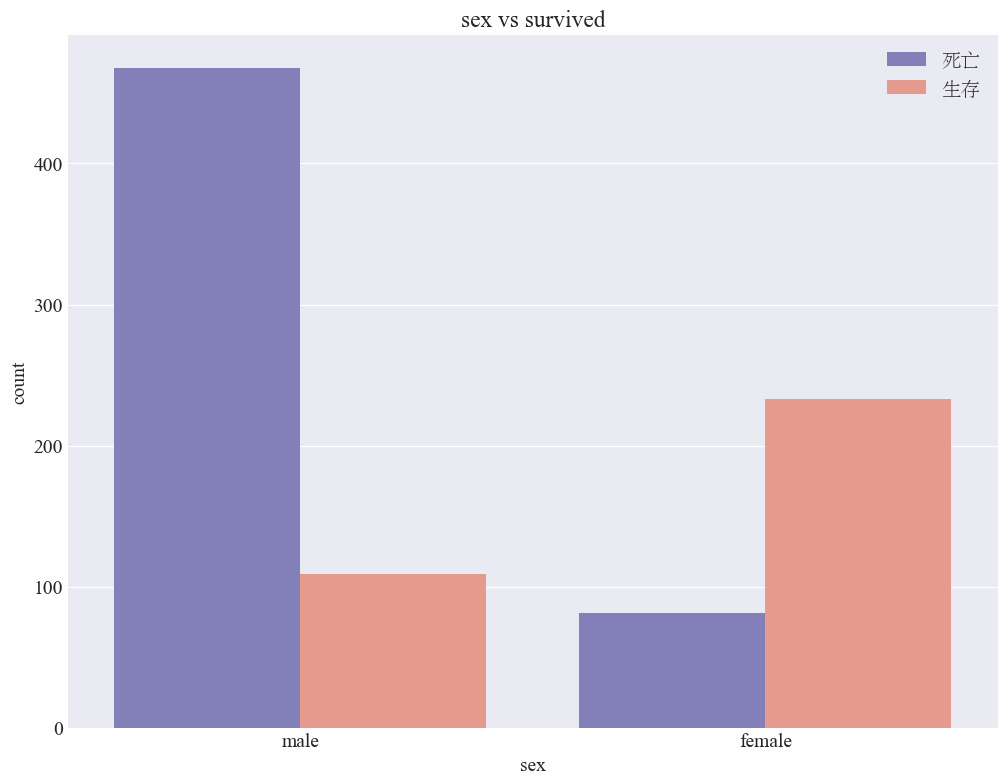

In [78]:
import seaborn as sns
plt.figure(figsize = (12,9),dpi = 100)
sns.countplot(data = data_titan,x = 'sex',hue = 'survived',)
plt.legend(prop = {'family':'STsong'})
plt.title("sex vs survived")
plt.show

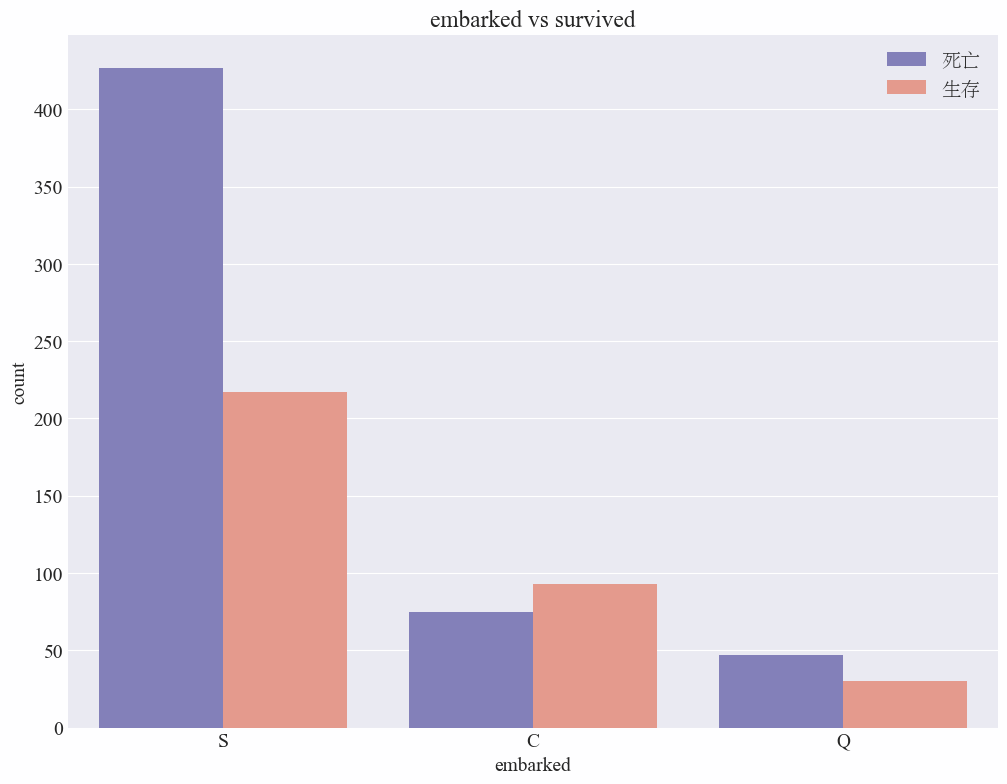

In [79]:
import seaborn as sns
plt.figure(figsize = (12,9),dpi = 100)
sns.countplot(data = data_titan,x = 'embarked',hue = 'survived',)
plt.legend(prop = {'family':'STsong'})
plt.title("embarked vs survived")
plt.show()

In [80]:
data_titan.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,死亡,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,生存,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,生存,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,生存,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,死亡,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data_titan.groupby(by = ['age','survived']).size()

age    survived
0.42   生存          1
0.67   生存          1
0.75   生存          2
0.83   生存          2
0.92   生存          1
                  ..
70.00  死亡          2
70.50  死亡          1
71.00  死亡          2
74.00  死亡          1
80.00  生存          1
Length: 142, dtype: int64

In [82]:
def set_age(x):
    if x>0 &x<18:
        return '小孩'
    elif x>=18 & x<60:
        return '中年'
    else:
        return '老年'

In [88]:
bins=  range(0,110,10)
labels = [f"{i}~{i+10}" for i in bins[:-1]]
data_titan['age_band'] = pd.cut(data_titan['age'],bins=  bins,labels = labels,right = False)

In [86]:
bins

range(0, 110, 10)

In [89]:
data_titan= data_titan[data_titan['age_band'].notna()].copy()

In [91]:
titance_age=  data_titan.groupby('age_band')['survived'].value_counts().unstack()
titance_age['survival_rate'] = round(titance_age['生存']/titance_age.sum(axis = 1) * 100,2)

In [92]:
titance_age.fillna(0,inplace = True)

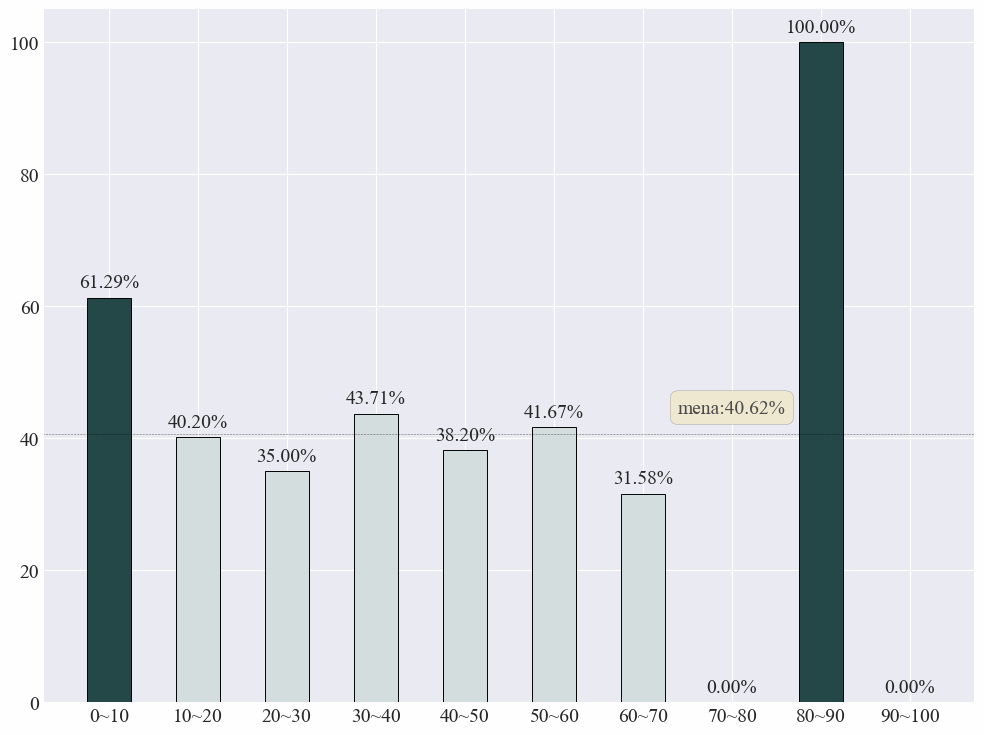

In [96]:
coloc_map = ['#d4dddd' for i in range(9)]
coloc_map[0] = coloc_map[8] = '#244747'
plt.figure(figsize = (12,9),dpi = 100)
plt.bar(titance_age['survival_rate'].index,
        titance_age['survival_rate'],
        color = coloc_map,
        width = 0.5,
        edgecolor = 'black',
        lw = .7
        )
mean = data_titan['survived'].value_counts(normalize = True)['生存']*100
plt.axhline(mean,color = 'black',lw = .4,ls = 'dotted')
plt.annotate(f"mena:{mean:.4}%",xy=(7,mean+4),va = 'center',ha = 'center',
             color = '#4a4a4a',bbox =dict(boxstyle='round',pad =.4,facecolor= '#efe8d1',linewidth = .1)
             )
for i in titance_age['survival_rate'].index:
    plt.annotate(f"{titance_age['survival_rate'][i]:0.02f}%",
                 xy=(i,titance_age['survival_rate'][i]+2.3),ha = 'center',va = 'center',
                 )
plt.show()